In [1]:
# biblioteki do manipulacji zbiorem
import pandas as pd
import numpy as np

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# redukcja wymiarów zbioru
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

# standaryzacja danych
from sklearn.preprocessing import StandardScaler

# drzewa decyzyjne
from sklearn.ensemble import RandomForestClassifier

# biblioteki do grupowania hierarchicznego: sklearn i scipy
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


## Wczytanie danych

In [14]:
data = pd.read_csv('diabetes.csv')
data_X = data.loc[:, 'Pregnancies':'Age']
data_X = StandardScaler().fit_transform(data_X)
data_y = data.loc[:, 'Outcome']

## Test Bartlett'a

In [3]:
chi_square_value,p_value=calculate_bartlett_sphericity(data_X)
chi_square_value, p_value

(948.2262232122043, 6.115712714127705e-182)

## Test Kaiser-Meyer-Olkin (KMO)

In [4]:
kmo_all,kmo_model=calculate_kmo(data_X)
kmo_model

0.5889870819164519

## Analiza czynnikowa

In [5]:
fa = FactorAnalyzer()
fa.fit(data_X)
# Check Eigenvalues
eigenvalues, v = fa.get_eigenvalues()


In [6]:
all1 =[]
for a in range(0, len(eigenvalues)):
    all1.append(eigenvalues[a] / 8)
    print(a, '|', eigenvalues[a] )

0 | 2.094379945288806
1 | 1.7312101406197218
2 | 1.029629869184153
3 | 0.8755290438080354
4 | 0.7623443855511719
5 | 0.6826283879464932
6 | 0.4198161797057532
7 | 0.4044620478958689


In [7]:
sum = 0
iterator = 1
for b in all1:
    sum += b
    print(iterator, '|', "{:.1%}".format(sum))
    iterator += 1

1 | 26.2%
2 | 47.8%
3 | 60.7%
4 | 71.6%
5 | 81.2%
6 | 89.7%
7 | 94.9%
8 | 100.0%


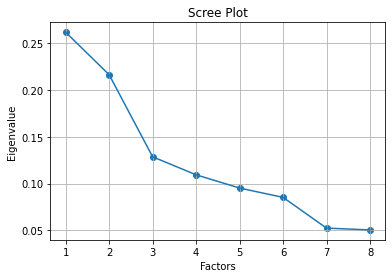

In [8]:
plt.scatter(range(1,data_X.shape[1]+1),all1)
plt.plot(range(1,data_X.shape[1]+1),all1)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [9]:
new_fa = FactorAnalyzer(n_factors=6)
new_fa.fit(data_X)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='promax',
               rotation_kwargs={}, use_smc=True)

In [10]:
pd.DataFrame(new_fa.loadings_.T, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']).T

0         1         2         3         4  \
Pregnancies               0.790760  0.056742 -0.004216  0.090027 -0.128399   
Glucose                   0.029910  0.044802  0.681253  0.128610  0.009227   
BloodPressure             0.001078  0.032511  0.005077  0.071790  0.546867   
SkinThickness             0.039994  0.605054 -0.256853  0.199975  0.087942   
Insulin                  -0.032283  0.762624  0.277348 -0.147757 -0.011050   
BMI                      -0.018683 -0.055473  0.145795  0.673132  0.070972   
DiabetesPedigreeFunction -0.003539  0.026045  0.014664  0.023293 -0.044421   
Age                       0.658425 -0.102375  0.056735 -0.176097  0.216587   

                                 5  
Pregnancies              -0.111386  
Glucose                   0.021952  
BloodPressure            -0.066618  
SkinThickness             0.098295  
Insulin                  -0.020116  
BMI                       0.037135  
DiabetesPedigreeFunction  0.368350  
Age                       0.173794

Pokażemy teraz jak wyglądają dane 

In [ ]:
pd.DataFrame(new_fa.transform(data_X), columns=['Współczynnik1', 'Współczynnik2', 'Współczynnik3', 'Współczynnik4', 'Współczynnik5', 'Współczynnik6'])

| Numer czynnika | Co wyjaśnia                     | Nowa nazwa                             |
|----------------|---------------------------------|----------------------------------------|
|        1       | Ilość ciąży i wiek              | Czynnik reprodukcji                    |
|        2       | Grubość skóry, poziom  insuliny | Czynnik otyłości i insuliny |
|        3       | Poziom glukozy                  | Czynnik poziomu glukozy                |
|        4       | BMI                             | Czynnik wskaźnika BMI                  |
|        5       | Ciśnienie krwi                  | Czynnik glukozy                        |
|        6       | Funkcja Pedigree                | Czynnik cukrzycy wśród przodków        |


In [ ]:
X = pd.DataFrame(new_fa.transform(data_X), columns=['Czynnik reprodukcji', 'Czynnik otyłości i insuliny', 'Czynnik poziomu glukozy', 'Czynnik wskaźnika BMI', 'Czynnik glukozy', 'Czynnik cukrzycy wśród przodków'])

In [ ]:
data_y = pd.DataFrame(data_y)
data_y = data_y.rename(columns={'Outcome': 'Czy chory?'})
all_data = X.join(data_y)
all_data

gadanko - wyjaśnienie, które zmienne są wyjaśniane przez które